# Graphs for SARSA and Q-learning for cliff jumping example

In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%model initialisations
class Grid():
    def __init__(self):
        self.row = 4
        self.column = 12
        self.state = np.empty((self.row,self.column))


        value = 0
        for i in range(self.row):
            for j in range(self.column):
                self.state[i,j] = value
                value+=1

        self.action = {100: 'left', 101: 'right', 102: 'north', 103: 'south'}

    def play(self,state,action):
        reward = 0
        state1 = np.inf
        tr = []
        sr = []
        thr = []
        fr = []

        #top row conditions
        for j in range(1,11):
            tr.append(self.state[0,j])
            sr.append(self.state[1,j])
            thr.append(self.state[2,j])
            fr.append(self.state[3,j])


        #left boundary conditions
        if state in (self.state[0,0],self.state[1,0],self.state[2,0],self.state[3,0]):
            if action == self.action[100]:    #left
                state1 = state
                reward = -1

            if action == self.action[101]: #right
                state1 = state + 1
                if state1 == self.state[3,1]:
                    state1 = state
                    reward = -100
                else:
                    state1 = state + 1
                    reward = -1

            if action == self.action[102]:  #north
                state1 = state - 12
                if state1 not in self.state:
                    state1 = state
                    reward = -1
                else:
                    state1 = state - 12
                    reward = -1

            if action ==  self.action[103]:   #south
                state1 = state + 12
                if state1 not in self.state:
                    state1 = state
                    reward = -1
                else:
                    state1 = state + 12
                    reward = - 1

        #right most boundary conditions
        if state in (self.state[0,11],self.state[1,11],self.state[2,11]):
            if action == self.action[100]: #left
                state1 = state - 1
                reward = -1

            if action == self.action[101]:  #right
                state1 = state
                reward = -1

            if action == self.action[102]:  #north
                state1 = state - 12
                if state1 not in self.state:
                    state1 = state
                    reward = -1
                else:
                    state1 = state - 12
                    reward = -1

            if action ==  self.action[103]:   #south
                state1 = state + 12
                reward = - 1





        if state in tr:
            if action == self.action[100]: #left
                state1 = state - 1
                reward = -1

            if action == self.action[101]:  #right
                state1 = state + 1
                reward = -1

            if action == self.action[102]:  #north
                state1 = state
                reward = -1


            if action ==  self.action[103]:   #south
                state1 = state + 12
                reward = - 1

        #second row conditions
        if state in sr:
            if action == self.action[100]: #left
                state1 = state - 1
                reward = -1

            if action == self.action[101]:  #right
                state1 = state + 1
                reward = -1

            if action == self.action[102]:  #north
                state1 = state - 12
                reward = -1


            if action ==  self.action[103]:   #south
                state1 = state + 12
                reward = - 1

        if state in thr:
            if action == self.action[100]: #left
                state1 = state - 1
                reward = -1

            if action == self.action[101]:  #right
                state1 = state + 1
                reward = -1

            if action == self.action[102]:  #north
                state1 = state - 12
                reward = -1


            if action ==  self.action[103]:   #south
                state1 = self.state[3,0]
                reward = - 100

        if state in fr:
            action = self.action
            reward = -100
            state1 = self.state[3,0]

        return state1, reward

In [4]:
#%%Let's push agent in the cliff
a = Grid()
counter = 0
epsilon = 0.1
for i in range(a.row):
    for j in range(a.column):
        counter += 1
#total number of states
num_states = counter

#total number of actions
action_space = a.action.keys()
num_actions = len(action_space)


state_action = np.zeros((num_states,num_actions))
state_action[47] = 0
for i in range(num_states-1):
    for j in range(num_actions):
        q = np.random.rand(1)
        state_action[i,j] = q
state_action[47,:] = np.zeros((4,))

episodes = 500

act_n = np.arange(100,104)
act_nn = np.arange(0,4)
sum_rew = []
sum_rew1 = []

#SARSA
for k_eps in range(episodes):
    state_ep = []
    rew_ep = []
    start = a.state[3,0]
    state_ep.append(start)
    p = np.random.rand()
    if p < epsilon:
        #gives the index of action
        action_n = np.random.choice(act_nn)

        #gives the action
        action = a.action[action_n + 100]
    else:
        #gives the index of action
        action_n = np.argmax(state_action[int(start)])

        #gives the action
        action = a.action[action_n + 100]

    loop = True

    while loop == True:
        [state_new,rew] = a.play(start,action)

        q = np.random.rand()
        if q <  epsilon:

            #gives the index of action
            action1_n = np.random.choice(act_nn)

            #gives the action
            action1 = a.action[action1_n + 100]
        else:

            #gives the index of action
            action1_n = np.argmax(state_action[int(state_new)])

            #gives the action
            action1 = a.action[action1_n + 100]

        state_action[int(start),action_n] = \
        state_action[int(start),action_n] + \
      0.02 * (rew + state_action[int(state_new),action1_n] - \
                                 state_action[int(start),action_n])

        state_ep.append(state_new)
        rew_ep.append(rew)
        start = state_ep[-1]
        action = action1
        action_n = action1_n


        if start == a.state[3,11]:
            loop = False
            sum_rew = np.sum(rew_ep)

    if np.mod(k_eps,1) == 0:

        sum_rew1.append(sum_rew)
        #print('Episode : ',k_eps,sum_rew)
        #print('Episode : ',k_eps,state_ep,rew_ep)

sarsa_plt = sum_rew1

In [5]:
#%%Q learning
a = Grid()
counter = 0
epsilon = 0.1
for i in range(a.row):
    for j in range(a.column):
        counter += 1
#total number of states
num_states = counter

#total number of actions
action_space = a.action.keys()
num_actions = len(action_space)


state_action = np.zeros((num_states,num_actions))
state_action[47] = 0
for i in range(num_states-1):
    for j in range(num_actions):
        q = np.random.rand(1)
        state_action[i,j] = q
state_action[47,:] = np.zeros((4,))

episodes = 500

act_n = np.arange(100,104)
act_nn = np.arange(0,4)
sum_rew = []
sum_rew1 = []

for k_eps in range(episodes):
    state_ep = []
    rew_ep = []
    start = a.state[3,0]
    state_ep.append(start)

    loop = True

    while loop == True:
        q = np.random.rand()

        if q< epsilon:

            #gives the index of action
            action1_n = np.random.choice(act_nn)

            #gives the action
            action1 = a.action[action1_n + 100]
        else:

            #gives the index of action
            action1_n = np.argmax(state_action[int(start)])

            #gives the action
            action1 = a.action[action1_n + 100]
        [state_new,rew] = a.play(start,action1)

        state_action[int(start),action1_n] = \
        state_action[int(start),action1_n] + \
        0.02 *(rew + np.max(state_action[int(state_new),:]) - \
                                 state_action[int(start),action1_n])

        state_ep.append(state_new)
        rew_ep.append(rew)
        start = state_new



        if start == a.state[3,11]:
            loop = False
            sum_rew = np.sum(rew_ep)

    if np.mod(k_eps,1) == 0:
        print('Episode : ',k_eps)
        sum_rew1.append(sum_rew)

Episode :  0
Episode :  1
Episode :  2
Episode :  3
Episode :  4
Episode :  5
Episode :  6
Episode :  7
Episode :  8
Episode :  9
Episode :  10
Episode :  11
Episode :  12
Episode :  13
Episode :  14
Episode :  15
Episode :  16
Episode :  17
Episode :  18
Episode :  19
Episode :  20
Episode :  21
Episode :  22
Episode :  23
Episode :  24
Episode :  25
Episode :  26
Episode :  27
Episode :  28
Episode :  29
Episode :  30
Episode :  31
Episode :  32
Episode :  33
Episode :  34
Episode :  35
Episode :  36
Episode :  37
Episode :  38
Episode :  39
Episode :  40
Episode :  41
Episode :  42
Episode :  43
Episode :  44
Episode :  45
Episode :  46
Episode :  47
Episode :  48
Episode :  49
Episode :  50
Episode :  51
Episode :  52
Episode :  53
Episode :  54
Episode :  55
Episode :  56
Episode :  57
Episode :  58
Episode :  59
Episode :  60
Episode :  61
Episode :  62
Episode :  63
Episode :  64
Episode :  65
Episode :  66
Episode :  67
Episode :  68
Episode :  69
Episode :  70
Episode :  71
Ep

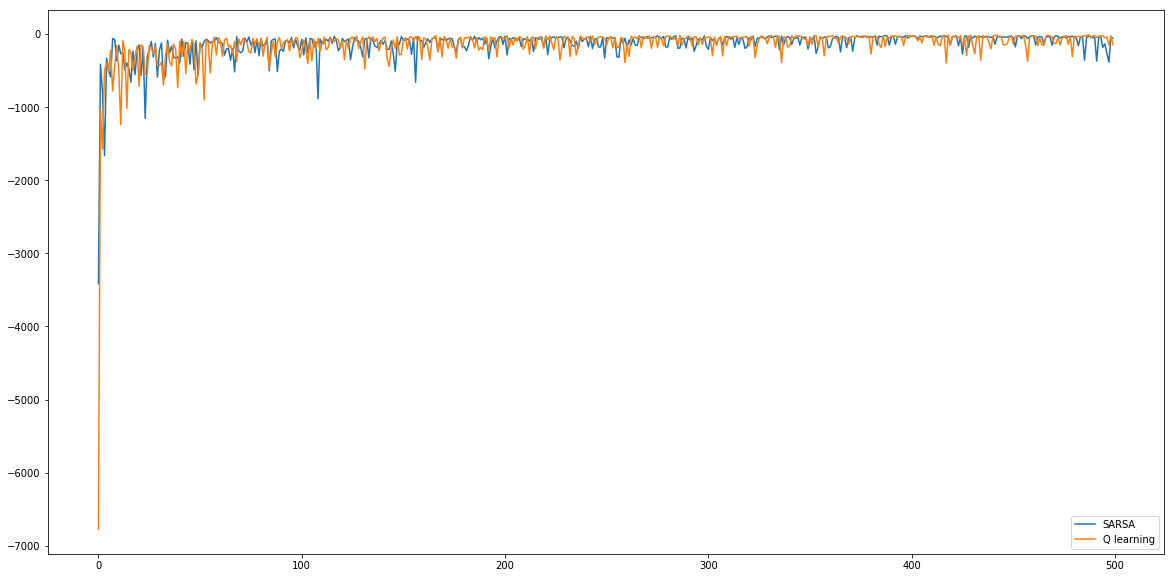

In [7]:
plt.figure(figsize=(20,10))
plt.plot(sarsa_plt,label = 'SARSA')
plt.plot(sum_rew1, label = 'Q learning')
plt.legend()